In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline
print('Libraries imported successfully')

Libraries imported successfully


In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


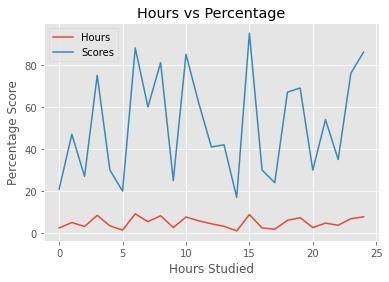

In [10]:
plt.style.use('ggplot')
df.plot(kind = 'line')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

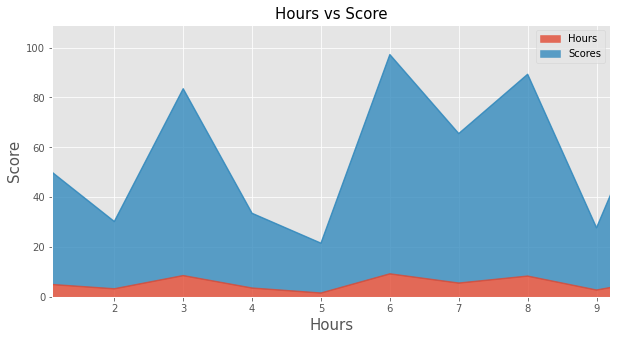

In [11]:
xmin = min(df.Hours)
xmax = max(df.Hours)
df.plot(kind = 'area' , alpha = 0.8 , stacked = True , figsize = (10 , 5) , xlim = (xmin , xmax))
plt.title('Hours vs Score',size=15)
plt.xlabel('Hours',size=15)
plt.ylabel('Score',size=15)
plt.show()

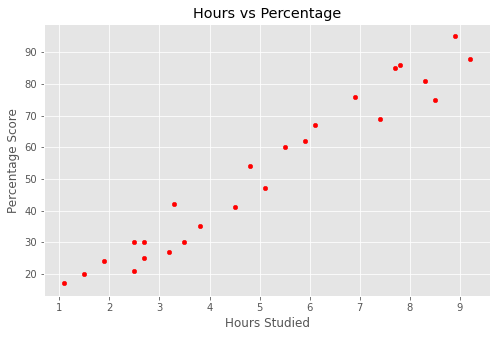

In [12]:
df.plot(kind = 'scatter' , x = 'Hours' , y = 'Scores' , color = 'r' , figsize = (8 , 5))
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [13]:
x = np.asanyarray(df[['Hours']])
y = np.asanyarray(df['Scores'])

train_x , test_x , train_y , test_y = train_test_split(x , y , test_size = 0.2 , random_state = 2)

regressor = LinearRegression()
regressor.fit(train_x , train_y)

print('Training Completed\n')
print('Coefficients: ' , regressor.coef_)
print('Intercept : ' , regressor.intercept_)


Training Completed

Coefficients:  [9.94061514]
Intercept :  1.5079104828268726


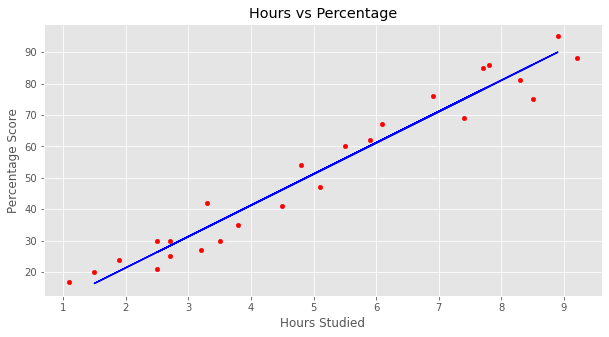

In [15]:
df.plot(kind = 'scatter' , x = 'Hours' , y = 'Scores' , figsize = [10 , 5] , color = 'r')
plt.plot(train_x , regressor.coef_[0]*train_x + regressor.intercept_ , color = 'b')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [16]:
from sklearn import metrics
from sklearn.metrics import r2_score

y_pred = regressor.predict(test_x)
print('Mean Absolute error : {}'.format(metrics.mean_absolute_error(y_pred , test_y)))
print('R2 Score : %.2f' % r2_score(y_pred , test_y))

Mean Absolute error : 4.877039354964484
R2 Score : 0.98


In [17]:
df2 = pd.DataFrame({'Actual' : test_y , 'predicted' : y_pred})
df2

,Actual,predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


In [21]:
hours = 100.25
predicted_score = regressor.predict([[hours]])
print(f'No of hours ={hours}')
print(f'Predicted score = {predicted_score[0]}')

No of hours =100.25
Predicted score = 998.0545785824614
